## Import

In [1]:
# !pip install easyocr
# !pip install onnx

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import easyocr
import os
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np


In [16]:
import torch
torch.cuda.is_available()

True

## Test

### Test with pytorch model

Load model by easyOCR API (https://www.jaided.ai/easyocr/documentation/)

In [17]:
path = os.path.join(os.getcwd(), 'models')
reader = easyocr.Reader(lang_list  = ['en','th'],gpu = True, 
                        model_storage_directory = path,
                        user_network_directory = path,
                        recog_network ='rosetta_hippo_300k_bw')

config: models/rosetta_hippo_300k_bw.yaml
--------------------
Transformation: None
FeatureExtraction: ResNet
SequenceModeling: None
Prediction: CTC


In [18]:
def draw_box(im,box):
    pts = np.array(box, dtype=np.int32)
    cv.polylines(im,[pts],True,(255,0,0))

In [19]:
img_path = '10.jpg'
reader.recognize(img_path)

[([[0, 0], [100, 0], [100, 29], [0, 29]], '23 มี.ค. 2571', 0.9004798588605412)]

detection + recognition

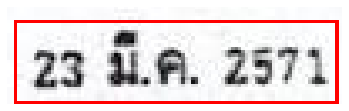

[([[2, 4], [98, 4], [98, 28], [2, 28]], '23 ม.A. 2571', 0.4626193490268029)]

In [20]:
img_path = '10.jpg'
im = plt.imread(img_path)
result = reader.readtext(img_path)
box = result[0][0]
draw_box(im,box)
plt.imshow(im)
plt.axis('off')
plt.show()
result


recognition

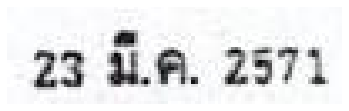

[([[0, 0], [100, 0], [100, 29], [0, 29]], '23 มี.ค. 2571', 0.9004798588605412)]

In [21]:
img_path = '10.jpg'
im = plt.imread(img_path)
result = reader.recognize(img_path)
plt.imshow(im)
plt.axis('off')
plt.show()
result

### Test with onnx model

In [22]:
from easyocr.utils import CTCLabelConverter
from test_deploy import onnx_recognize
import onnxruntime

load onnx model

In [23]:
ort_session = onnxruntime.InferenceSession("rosetta_recognitionModel.onnx", providers=['CUDAExecutionProvider'])
ort_session.get_providers()
ort_session.set_providers(['CUDAExecutionProvider'])

In [24]:
import yaml
file_path = '/home/EasyOCR/my_model/user_network/hippo_300k_synthtiger.yaml'
with open(file_path, 'r', encoding="utf8") as stream:
        opt = yaml.safe_load(stream)

In [25]:
character = opt['character_list']
separator_list = {}
dict_list = {}
converter = CTCLabelConverter(character, separator_list, dict_list)

In [26]:
random_file_path = '10.jpg'
onnx_recognize(random_file_path, ort_session, converter)

[['23 มี.ค. 2571', 0.45502438680213836]]